# Boston House Price Prediction

In this project, I will build model which predicts house price according to change in house features. 
Linear regression algorithm will be used. 

In [61]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [45]:
BostonHouse = pd.read_csv('housing.csv')

In [63]:
BostonHouse.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [65]:
BostonHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [68]:
BostonHouse.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

Dataset has these columns:RM - room number, LSTAT - % lower status of the population, PTRATIO - pupil-teacher ratio by town, MEDV - median value of owner-occupied homes in $1000's.


# EDA 

Creating simple plots to check data

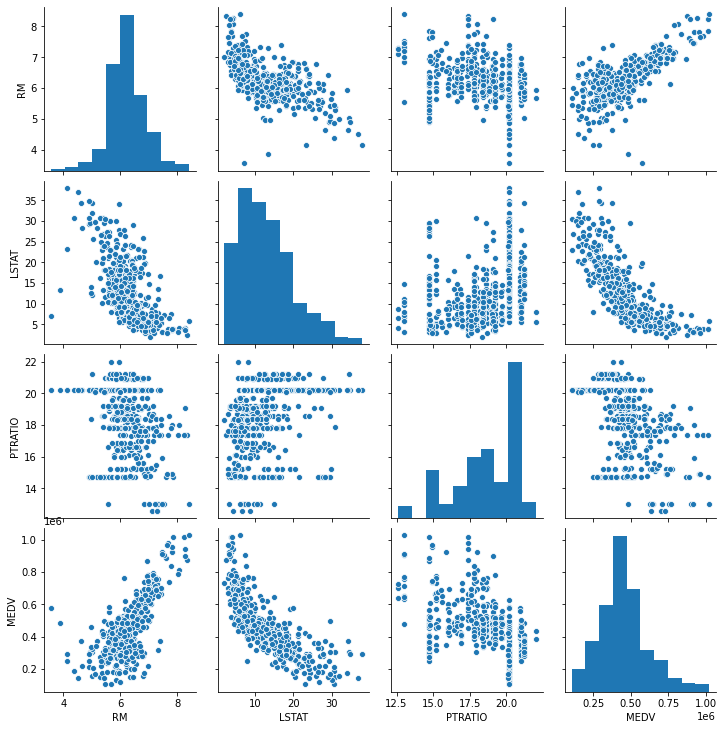

In [71]:
sns.pairplot(BostonHouse)

From this plot, it can be seen positive linear correlation between RM and MEDV and negative linear correlation between LSTAT and MEDV. 

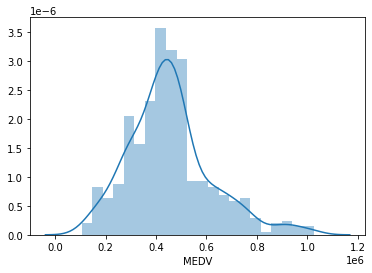

In [48]:
sns.distplot(BostonHouse['MEDV'])

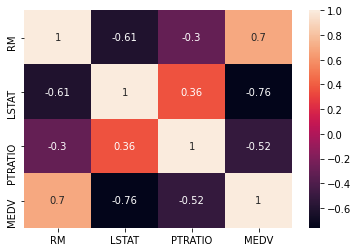

In [62]:
sns.heatmap(BostonHouse.corr(),annot=True)

It can be seen that there is fair correlation between RM (average number of rooms per dwelling) and MEDV (Median value of owner-occupied homes in $1000's)

## X and y arrays

In [55]:
X = BostonHouse[['RM','LSTAT','PTRATIO']]

In [57]:
y = BostonHouse['MEDV']

Before training out regression model, I am splitting data into X array that contains the features to train on (RM - room number, LSTAT - % lower status of the population, PTRATIO -pupil-teacher ratio by town) and a y array with target variable, in this case MEDV - median value of owner-occupied homes in $1000's.

## Train Test Split 

In [72]:
from sklearn.model_selection import train_test_split

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

NameError: name 'train_test_split' is not defined

## Creating and Training the Model

In [1]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [79]:
print(lm.intercept_)

407492.91344907566


In [80]:
print(lm.coef_)

[ 87392.27590737 -10331.97400161 -19766.32772465]


In [86]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [87]:
coef_df

,Coefficient
RM,87392.275907
LSTAT,-10331.974002
PTRATIO,-19766.327725


How to interpret the coefficients:
- Holding all other features fixed, a 1 unit increase in RM (Room Number) is associated with an increase of $87392.27.

- Holding all other features fixed, a 1 unit increase in LSTAT (% lower status of the population) is associated with an decrease of $10331.97.

- Holding all other features fixed, a 1 unit increase in PTRATIO (pupil-teacher ratio by town) is associated with an decrease of $19766.32.
    

## Predictions from our Model

In [88]:
predictions = lm.predict(X_test)

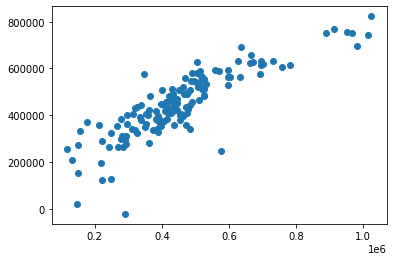

In [89]:
plt.scatter(y_test,predictions)

### Residual Histogram

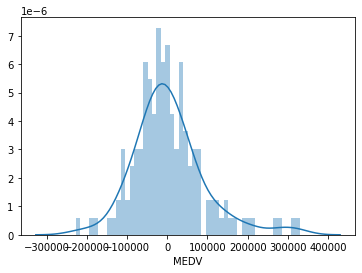

In [91]:
sns.distplot((y_test-predictions), bins=50)

##### It can be seen that residuals are normally distributed, therefore model was correct choice for data. 

In [92]:
from sklearn import metrics

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 64182.286048957445
MSE: 8051114630.071594
RMSE: 89728.00360016707
